In [145]:
# Importing Necessary Libraries and Functions
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Numpy and Pandas Library

import numpy as np
import pandas as pd

#Import Matplotlib and Seaborn Libraries for Data Visulaization

import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

from sklearn.model_selection import train_test_split

# Using sklearn library and importing MinMaxScaler function for feature scaling

from sklearn.preprocessing import MinMaxScaler

# Using sklearn library and importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Importing statsmodel library

import statsmodels.api as sm

#Using statsmodel library and importing variance_inflation_factor function

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Using statsmodel library and importing R-square function

from sklearn.metrics import r2_score

## Step 1: Reading and carrying out Data Inspection

Let us first read the housing dataset and do basic data inspection i.e. is checking null values,duplicates etc.

In [80]:
#reading the dataset
bike = pd.read_csv("day.csv")

In [43]:
# Check the head of the dataset
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [45]:
bike.shape

(730, 16)

In [47]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [49]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [51]:
#drop duplicate
bike.shape,bike.drop_duplicates().shape

((730, 16), (730, 16))

### Insights on Data Inspection:-

- Bike Dataset have 730 rows and 16 columns in  with no null and duplicates valuesset.

## Step 2: Dropping Unnecessary Columns

- We will drop column Instant since it is just a row identifier and does not have any role in model building.
- We will drop column 'dteday' since it is just a row identifier and does not have any role in model building.
- We will drop columns 'count' & 'registered' since it is alredy included in target variable 'cnt'cnt'cnt'

In [82]:
bike.drop(['instant','dteday','casual','registered'],axis = 1, inplace = True)

In [84]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Step 3: Value Mapping

- We can see that our dataset has many categorical columns like season,yr,mnth,holiday,weekday,weathersit with values as 1,2,3,4 etc.

- But in order to fit a regression line, we would need to create dummy variables and for that these variables need to be converted to string

In [86]:
#mapping values of season from data dictionary
bike[['season']] = bike[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

In [88]:
#mapping values of mnth from data dictionary
bike[['mnth']] = bike[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug'
                                                        ,9:'sep',10:'oct',11:'nov',12:'dec'}))

In [90]:
#mapping values of weekday  in dictionary its not mention which day which number ,below is my assumption
bike[['weekday']] = bike[['weekday']].apply(lambda x : x.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'}))

In [92]:
#mapping values of weathersit from data dictionary
bike[['weathersit']] = bike[['weathersit']].apply(lambda x : x.map({1:'clear',2:'mist & cloudy',3:'light snow & rain'
                                                                    ,4:'heavy rain & ice pallets',}))

In [94]:
bike.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  jan        0     sat           0  mist & cloudy  14.110847   
1  spring   0  jan        0     sun           0  mist & cloudy  14.902598   
2  spring   0  jan        0     mon           1          clear   8.050924   
3  spring   0  jan        0     tue           1          clear   8.200000   
4  spring   0  jan        0     wed           1          clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Step 4: Visualising the Data
We'll visualise our data using matplotlib and seaborn.born`.

#### Visualising Numeric Variables

make a scatterplot of all the numeric variables w.r.t to Target Variable

In [108]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.scatterplot(x = 'hum', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bike)
plt.show()

### Insights on Target Variable vs Numeric Variables:-

- Target Variable Cnt is postively correlated with temp variable.
- Target Variable Cnt is postively correlated with atemp variable.
- Target Variable Cnt is negatively correlated with windspeed variable.

#### Visualising Categorical Variables
. Let's make a boxplot of these variables w.r.t to Target Variable

In [112]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt', data=bike)
plt.subplot(4,2,2)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(4,2,3)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(4,2,4)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

### Insights on Target Variable vs Categorical Variables:-

- There is significant drop in target variable in spring season.
- Majority of bikes are rented in fall season.
- There is increasing trend in bikes rented in the month of January to September with dip in month of November & December.
- Majority of bikes are rented in the month of June to September.
- Majority of bikes are rented when there is no holiday.
- There is pretty slight variation in bikes getting rented among days.
- Bikes are rented more when there is clear weather with few clouds or partly cloudy.
- Bikes are rented when there are light snow and rain with scattered clouds.
- Bikes are not rented when there is heavy rain accompanied by thunderstorms and falling of ice pallets.
- Bikes are rented more in year 2019 compared to 2018

#### Visualising Correlation among Variables

Checking Correlation among variables to discover multicollinearity

In [137]:
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  jan        0     sat           0  mist & cloudy  14.110847   
1  spring   0  jan        0     sun           0  mist & cloudy  14.902598   
2  spring   0  jan        0     mon           1          clear   8.050924   
3  spring   0  jan        0     tue           1          clear   8.200000   
4  spring   0  jan        0     wed           1          clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

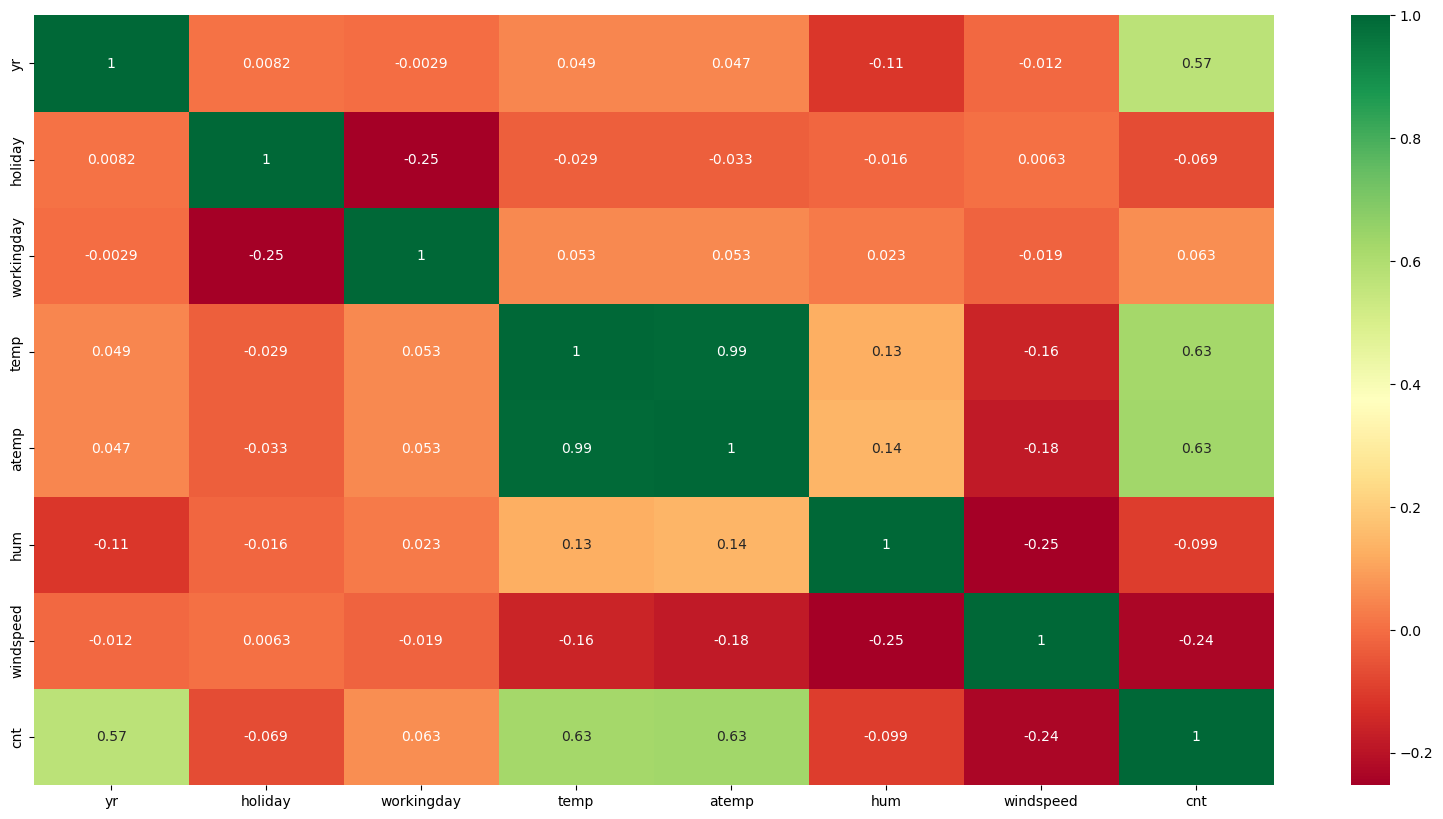

In [167]:
# Let's check the Correlation
plt.figure(figsize = (20,10))
sns.heatmap(bike.corr(numeric_only=True),cmap='RdYlGn',annot=True)
plt.show()

### Insights on Correlation:-

- Target Variable is highly positively correlated with predictor variable 'temp' , 'atemp' and 'yr' 
- Target Variable is negatively correlated with predictor variable 'windspeed'
- Predictor Variable 'temp' and 'atemp' are highly correlated with each other which shows the case of multicollinearity.

In [170]:
#Since we observed that temp and atemp are highly correlated which is not desirable hence dropping variable atemp.
bike.drop(['atemp'],axis = 1, inplace = True)

## Step 5: Data Preparation
Use dummy variable for catogorical columns which has multiple levels.`.

In [177]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(bike['season'],dtype=int)

In [179]:
season_dummy.head()

fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

In [184]:
# Let's drop the first column from season_dummy df using 'drop_first = True'
season_dummy = pd.get_dummies(bike['season'], dtype=int,drop_first = True)

In [190]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummy' and dropping 1st column.
mnth_dummy = pd.get_dummies(bike['mnth'], dtype=int, drop_first = True)

In [192]:
mnth_dummy.head()

aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0

In [194]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy' and dropping 1st column.
weekday_dummy = pd.get_dummies(bike['weekday'], dtype=int, drop_first = True)

In [196]:
weekday_dummy.head()

mon  sat  sun  thu  tue  wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
3    0    0    0    0    1    0
4    0    0    0    0    0    1

In [198]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy' and dropping 1st column.
weathersit_dummy = pd.get_dummies(bike['weathersit'], dtype=int, drop_first = True)

In [200]:
weathersit_dummy.head()

light snow & rain  mist & cloudy
0                  0              1
1                  0              1
2                  0              0
3                  0              0
4                  0              0

In [202]:
# Add the dummy variables datasets to the original bike dataframe
bike = pd.concat([bike, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy ], axis = 1)

In [204]:
bike.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  jan        0     sat           0  mist & cloudy  14.110847   
1  spring   0  jan        0     sun           0  mist & cloudy  14.902598   
2  spring   0  jan        0     mon           1          clear   8.050924   
3  spring   0  jan        0     tue           1          clear   8.200000   
4  spring   0  jan        0     wed           1          clear   9.305237   

       hum  windspeed   cnt  spring  summer  winter  aug  dec  feb  jan  jul  \
0  80.5833  10.749882   985       1       0       0    0    0    0    1    0   
1  69.6087  16.652113   801       1       0       0    0    0    0    1    0   
2  43.7273  16.636703  1349       1       0       0    0    0    0    1    0   
3  59.0435  10.739832  1562       1       0       0    0    0    0    1    0   
4  43.6957  12.522300  1600       1       0       0    0    0    0    1    0   

   jun  mar  may  nov  oct  sep  mon  sat  sun  thu  tue  wed  \
0    0    0    0    0    0    0    0    1    0    0    0    0   
1    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    1    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    1    0   
4    0    0    0    0    0    0    0    0    0    0    0    1   

   light snow & rain  mist & cloudy  
0                  0              1  
1                  0              1  
2                  0              0  
3                  0              0  
4                  0              0

In [206]:
# Drop 'season' , 'mnth' , 'weekday' , 'weathersit' as we have created the dummies for it
bike.drop(['season' , 'mnth' , 'weekday' , 'weathersit'], axis = 1, inplace = True)

In [208]:
bike.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           0  14.110847  80.5833  10.749882   985       1   
1   0        0           0  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  mon  \
0       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
1       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
2       0       0    0    0    0    1    0    0    0    0    0    0    0    1   
3       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
4       0       0    0    0    0    1    0    0    0    0    0    0    0    0   

   sat  sun  thu  tue  wed  light snow & rain  mist & cloudy  
0    1    0    0    0    0                  0              1  
1    0    1    0    0    0                  0              1  
2    0    0    0    0    0                  0              0  
3    0    0    0    1    0                  0              0  
4    0    0    0    0    1                  0              0

## Step 6: Splitting the Data into Training and Testing Setst.

In [405]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# Considering 80 20 ratio of Train vs Test
bike_train, bike_test = train_test_split(bike, train_size = 0.8, test_size = 0.2, random_state = 100)

In [407]:
bike_test.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
184   0        1           0  29.793347  63.7917   5.459106  6043       0   
535   1        0           1  32.082500  59.2083   7.625404  6211       0   
299   0        0           1  19.270000  81.2917  13.250121  2659       0   
221   0        0           1  31.433347  42.4167  13.417286  4780       0   
152   0        0           1  29.315000  30.5000  19.583229  4968       0   

     summer  winter  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  \
184       0       0    0    0    0    0    1    0    0    0    0    0    0   
535       1       0    0    0    0    0    0    1    0    0    0    0    0   
299       0       1    0    0    0    0    0    0    0    0    0    1    0   
221       0       0    1    0    0    0    0    0    0    0    0    0    0   
152       1       0    0    0    0    0    0    1    0    0    0    0    0   

     mon  sat  sun  thu  tue  wed  light snow & rain  mist & cloudy  
184    1    0    0    0    0    0                  0              1  
535    0    0    0    0    0    1                  0              0  
299    0    0    0    1    0    0                  0              1  
221    0    0    0    0    0    1                  0              0  
152    0    0    0    1    0    0                  0              0

In [403]:
bike.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           0  14.110847  80.5833  10.749882   985       1   
1   0        0           0  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  mon  \
0       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
1       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
2       0       0    0    0    0    1    0    0    0    0    0    0    0    1   
3       0       0    0    0    0    1    0    0    0    0    0    0    0    0   
4       0       0    0    0    0    1    0    0    0    0    0    0    0    0   

   sat  sun  thu  tue  wed  light snow & rain  mist & cloudy  
0    1    0    0    0    0                  0              1  
1    0    1    0    0    0                  0              1  
2    0    0    0    0    0                  0              0  
3    0    0    0    1    0                  0              0  
4    0    0    0    0    1                  0              0

In [409]:
bike_train.head()


yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
367   1        0           1   6.150000  44.1250  24.499957  2236       1   
648   1        0           1  17.835000  46.3333  12.166932  7570       0   
44    0        0           1  17.015000  37.5833  27.999836  1913       1   
705   1        0           1  13.154153  76.4167   8.750200  5008       0   
379   1        0           0   6.833347  41.9167  16.834286  2311       1   

     summer  winter  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  \
367       0       0    0    0    0    1    0    0    0    0    0    0    0   
648       0       1    0    0    0    0    0    0    0    0    0    1    0   
44        0       0    0    0    1    0    0    0    0    0    0    0    0   
705       0       1    0    1    0    0    0    0    0    0    0    0    0   
379       0       0    0    0    0    1    0    0    0    0    0    0    0   

     mon  sat  sun  thu  tue  wed  light snow & rain  mist & cloudy  
367    0    0    0    0    1    0                  0              0  
648    0    0    0    1    0    0                  0              0  
44     1    0    0    0    0    0                  0              0  
705    0    0    0    0    0    0                  0              1  
379    0    0    1    0    0    0                  0              0

## Rescaling the Features
- Use of standartisation or normalisation
- use MinMax scaling to do this.

In [411]:
scaler = MinMaxScaler()

In [413]:
# Apply scaler() to all the numeric columns except the 'binary' and 'dummy' variables
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_train[bike_vars] = scaler.fit_transform(bike_train[bike_vars])

In [415]:
bike_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
367   1        0           1  0.113228  0.454701   0.695175  0.254717       1   
648   1        0           1  0.468352  0.477458   0.299450  0.868385       0   
44    0        0           1  0.443431  0.387290   0.807474  0.217556       1   
705   1        0           1  0.326094  0.787463   0.189819  0.573631       0   
379   1        0           0  0.133996  0.431945   0.449210  0.263346       1   

     summer  winter  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  \
367       0       0    0    0    0    1    0    0    0    0    0    0    0   
648       0       1    0    0    0    0    0    0    0    0    0    1    0   
44        0       0    0    0    1    0    0    0    0    0    0    0    0   
705       0       1    0    1    0    0    0    0    0    0    0    0    0   
379       0       0    0    0    0    1    0    0    0    0    0    0    0   

     mon  sat  sun  thu  tue  wed  light snow & rain  mist & cloudy  
367    0    0    0    0    1    0                  0              0  
648    0    0    0    1    0    0                  0              0  
44     1    0    0    0    0    0                  0              0  
705    0    0    0    0    0    0                  0              1  
379    0    0    1    0    0    0                  0              0

In [417]:
bike_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.513699    0.027397    0.667808    0.537414    0.649499    0.319463   
std      0.500241    0.163378    0.471403    0.225336    0.144219    0.168114   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.340113    0.535852    0.199177   
50%      1.000000    0.000000    1.000000    0.545191    0.653714    0.294764   
75%      1.000000    0.000000    1.000000    0.736512    0.752361    0.410413   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter         aug         dec  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.515792    0.251712    0.246575    0.250000    0.090753    0.087329   
std      0.225336    0.434369    0.431387    0.433384    0.287504    0.282558   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.350696    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.522837    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.691872    1.000000    0.000000    0.250000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              feb         jan         jul         jun         mar         may  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.073630    0.087329    0.075342    0.077055    0.090753    0.087329   
std      0.261392    0.282558    0.264169    0.266907    0.287504    0.282558   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              nov         oct         sep         mon         sat         sun  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.080479    0.092466    0.080479    0.148973    0.150685    0.154110   
std      0.272267    0.289931    0.272267    0.356367    0.358048    0.361363   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              thu         tue         wed  light snow & rain  mist & cloudy  
count  584.000000  584.000000  584.000000         584.000000     584.000000  
mean     0.135274    0.133562    0.154110           0.027397       0.342466  
std      0.342309    0.340472    0.361363           0.163378       0.474941  
min      0.000000    0.000000    0.000000           0.000000       0.000000  
25%      0.000000    0.000000    0.000000           0.000000       0.000000  
50%      0.000000    0.000000    0.000000           0.000000       0.000000  
75%      0.000000    0.000000    0.000000           0.000000       1.000000  
max      1.000000    1.000000    1.000000           1.000000       1.000000

In [419]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 7: Building a linear model
Use of linearRegression Function and RFEn)

In [243]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [421]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [423]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 10),
 ('mar', False, 14),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sep', False, 2),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', False, 5),
 ('thu', False, 12),
 ('tue', False, 13),
 ('wed', False, 11),
 ('light snow & rain', True, 1),
 ('mist & cloudy', True, 1)]

In [425]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sat', 'light snow & rain',
       'mist & cloudy'],
      dtype='object')

In [427]:
X_train.columns[~rfe.support_]

Index(['summer', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'sep', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1

In [503]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [505]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [507]:
# Build a 1st fitted model
lr_1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [509]:
#Let's see the summary of our linear model
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.02e-223
Time:                        22:17:44   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3155      0.031     10.212      0.000       0.255       0.376
yr                    0.2289      0.007     30.876      0.000       0.214       0.243
holiday              -0.0436      0.024     -1.806      0.071      -0.091       0.004
workingday            0.0510      0.010      4.920      0.000       0.031       0.071
temp                  0.4458      0.031     14.594      0.000       0.386       0.506
hum                  -0.1295      0.035     -3.671      0.000      -0.199      -0.060
windspeed            -0.1838      0.024     -7.763      0.000      -0.230      -0.137
spring               -0.1105      0.014     -7.800      0.000      -0.138      -0.083
winter                0.0817      0.012      6.557      0.000       0.057       0.106
dec                  -0.0604      0.015     -3.937      0.000      -0.091      -0.030
jan                  -0.0500      0.016     -3.056      0.002      -0.082      -0.018
jul                  -0.0787      0.016     -5.030      0.000      -0.109      -0.048
nov                  -0.0688      0.017     -4.041      0.000      -0.102      -0.035
sat                   0.0613      0.013      4.618      0.000       0.035       0.087
light snow & rain    -0.2634      0.025    -10.534      0.000      -0.313      -0.214
mist & cloudy        -0.0597      0.010     -6.135      0.000      -0.079      -0.041
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [511]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                 hum  25.87
3                temp  18.12
2          workingday   5.01
5           windspeed   4.25
6              spring   3.06
7              winter   2.77
14      mist & cloudy   2.29
0                  yr   2.08
12                sat   1.90
9                 jan   1.71
11                nov   1.71
8                 dec   1.52
10                jul   1.38
13  light snow & rain   1.23
1             holiday   1.19

In [513]:
# Dropping varaible with very high VIF

X_train_rfe = X_train_rfe.drop('hum', axis=1)

In [515]:
# Build a 2nd fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.00e-221
Time:                        22:18:12   Log-Likelihood:                 591.49
No. Observations:                 584   AIC:                            -1153.
Df Residuals:                     569   BIC:                            -1087.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2460      0.025      9.971      0.000       0.198       0.294
yr                    0.2327      0.007     31.347      0.000       0.218       0.247
holiday              -0.0418      0.024     -1.715      0.087      -0.090       0.006
workingday            0.0527      0.010      5.042      0.000       0.032       0.073
temp                  0.4178      0.030     13.973      0.000       0.359       0.477
windspeed            -0.1600      0.023     -6.952      0.000      -0.205      -0.115
spring               -0.1124      0.014     -7.854      0.000      -0.141      -0.084
winter                0.0751      0.012      6.027      0.000       0.051       0.100
dec                  -0.0660      0.015     -4.278      0.000      -0.096      -0.036
jan                  -0.0544      0.016     -3.299      0.001      -0.087      -0.022
jul                  -0.0715      0.016     -4.561      0.000      -0.102      -0.041
nov                  -0.0690      0.017     -4.006      0.000      -0.103      -0.035
sat                   0.0642      0.013      4.793      0.000       0.038       0.091
light snow & rain    -0.3006      0.023    -13.004      0.000      -0.346      -0.255
mist & cloudy        -0.0807      0.008    -10.160      0.000      -0.096      -0.065
==============================================================================
Omnibus:                       99.012   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.247
Skew:                          -0.808   Prob(JB):                     1.72e-65
Kurtosis:                       6.106   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [517]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                temp  6.55
2          workingday  4.89
4           windspeed  4.25
5              spring  2.48
6              winter  2.40
0                  yr  2.07
11                sat  1.88
10                nov  1.68
8                 jan  1.63
13      mist & cloudy  1.55
7                 dec  1.43
9                 jul  1.33
1             holiday  1.19
12  light snow & rain  1.08

In [519]:
# Dropping varaible with high p value

X_train_rfe = X_train_rfe.drop('holiday', axis=1)

In [521]:
# Build a 3nd fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     242.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.72e-222
Time:                        22:19:02   Log-Likelihood:                 589.98
No. Observations:                 584   AIC:                            -1152.
Df Residuals:                     570   BIC:                            -1091.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2423      0.025      9.842      0.000       0.194       0.291
yr                    0.2325      0.007     31.269      0.000       0.218       0.247
workingday            0.0589      0.010      5.984      0.000       0.040       0.078
temp                  0.4154      0.030     13.884      0.000       0.357       0.474
windspeed            -0.1611      0.023     -6.989      0.000      -0.206      -0.116
spring               -0.1138      0.014     -7.948      0.000      -0.142      -0.086
winter                0.0752      0.012      6.025      0.000       0.051       0.100
dec                  -0.0675      0.015     -4.371      0.000      -0.098      -0.037
jan                  -0.0557      0.016     -3.375      0.001      -0.088      -0.023
jul                  -0.0712      0.016     -4.534      0.000      -0.102      -0.040
nov                  -0.0722      0.017     -4.210      0.000      -0.106      -0.039
sat                   0.0704      0.013      5.445      0.000       0.045       0.096
light snow & rain    -0.3003      0.023    -12.967      0.000      -0.346      -0.255
mist & cloudy        -0.0806      0.008    -10.129      0.000      -0.096      -0.065
==============================================================================
Omnibus:                      102.825   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.870
Skew:                          -0.833   Prob(JB):                     4.24e-69
Kurtosis:                       6.188   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [523]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                temp  6.22
1          workingday  4.34
3           windspeed  4.23
4              spring  2.44
5              winter  2.40
0                  yr  2.07
10                sat  1.76
9                 nov  1.65
7                 jan  1.62
12      mist & cloudy  1.55
6                 dec  1.42
8                 jul  1.33
11  light snow & rain  1.08

In [525]:
# temp varaible with high VIF

X_train_rfe = X_train_rfe.drop('temp', axis=1)

In [527]:
# Build a 4th fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.59e-187
Time:                        22:19:55   Log-Likelihood:                 504.91
No. Observations:                 584   AIC:                            -983.8
Df Residuals:                     571   BIC:                            -927.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5325      0.015     35.451      0.000       0.503       0.562
yr                    0.2417      0.009     28.240      0.000       0.225       0.258
workingday            0.0623      0.011      5.483      0.000       0.040       0.085
windspeed            -0.2088      0.026     -7.926      0.000      -0.261      -0.157
spring               -0.2366      0.013    -18.178      0.000      -0.262      -0.211
winter                0.0179      0.014      1.315      0.189      -0.009       0.045
dec                  -0.1299      0.017     -7.610      0.000      -0.163      -0.096
jan                  -0.1222      0.018     -6.703      0.000      -0.158      -0.086
jul                   0.0038      0.017      0.220      0.826      -0.030       0.037
nov                  -0.1308      0.019     -6.812      0.000      -0.169      -0.093
sat                   0.0717      0.015      4.799      0.000       0.042       0.101
light snow & rain    -0.3178      0.027    -11.892      0.000      -0.370      -0.265
mist & cloudy        -0.0892      0.009     -9.721      0.000      -0.107      -0.071
==============================================================================
Omnibus:                       92.043   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.201
Skew:                          -0.814   Prob(JB):                     1.70e-50
Kurtosis:                       5.602   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [529]:
# winter has high p value

X_train_rfe = X_train_rfe.drop('winter', axis=1)

In [531]:
# Build a 5th fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.58e-188
Time:                        22:20:45   Log-Likelihood:                 504.03
No. Observations:                 584   AIC:                            -984.1
Df Residuals:                     572   BIC:                            -931.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5374      0.015     36.885      0.000       0.509       0.566
yr                    0.2418      0.009     28.233      0.000       0.225       0.259
workingday            0.0621      0.011      5.460      0.000       0.040       0.084
windspeed            -0.2112      0.026     -8.034      0.000      -0.263      -0.160
spring               -0.2423      0.012    -19.762      0.000      -0.266      -0.218
dec                  -0.1206      0.016     -7.757      0.000      -0.151      -0.090
jan                  -0.1205      0.018     -6.622      0.000      -0.156      -0.085
jul                  -0.0005      0.017     -0.029      0.977      -0.033       0.032
nov                  -0.1172      0.016     -7.250      0.000      -0.149      -0.085
sat                   0.0717      0.015      4.794      0.000       0.042       0.101
light snow & rain    -0.3141      0.027    -11.812      0.000      -0.366      -0.262
mist & cloudy        -0.0888      0.009     -9.682      0.000      -0.107      -0.071
==============================================================================
Omnibus:                       87.720   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.880
Skew:                          -0.794   Prob(JB):                     7.23e-46
Kurtosis:                       5.453   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [533]:
# jul has high p value

X_train_rfe = X_train_rfe.drop('jul', axis=1)

In [535]:
# Build a 6th fitted model
X_train_lm = sm.add_constant(X_train_rfe)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.69e-189
Time:                        22:21:18   Log-Likelihood:                 504.03
No. Observations:                 584   AIC:                            -986.1
Df Residuals:                     573   BIC:                            -938.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5373      0.014     37.774      0.000       0.509       0.565
yr                    0.2418      0.009     28.259      0.000       0.225       0.259
workingday            0.0621      0.011      5.468      0.000       0.040       0.084
windspeed            -0.2112      0.026     -8.056      0.000      -0.263      -0.160
spring               -0.2423      0.012    -19.954      0.000      -0.266      -0.218
dec                  -0.1205      0.015     -7.794      0.000      -0.151      -0.090
jan                  -0.1205      0.018     -6.629      0.000      -0.156      -0.085
nov                  -0.1171      0.016     -7.311      0.000      -0.149      -0.086
sat                   0.0717      0.015      4.799      0.000       0.042       0.101
light snow & rain    -0.3140      0.027    -11.823      0.000      -0.366      -0.262
mist & cloudy        -0.0888      0.009     -9.768      0.000      -0.107      -0.071
==============================================================================
Omnibus:                       87.689   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.741
Skew:                          -0.794   Prob(JB):                     7.76e-46
Kurtosis:                       5.452   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [537]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          windspeed  3.47
1         workingday  2.93
3             spring  2.03
0                 yr  1.87
5                jan  1.58
9      mist & cloudy  1.50
7                sat  1.46
4                dec  1.13
6                nov  1.10
8  light snow & rain  1.06

## Now the model has acceptable VIF and good p value so we can choose this for prediction

## Step 8: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [553]:
y_train_pred = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

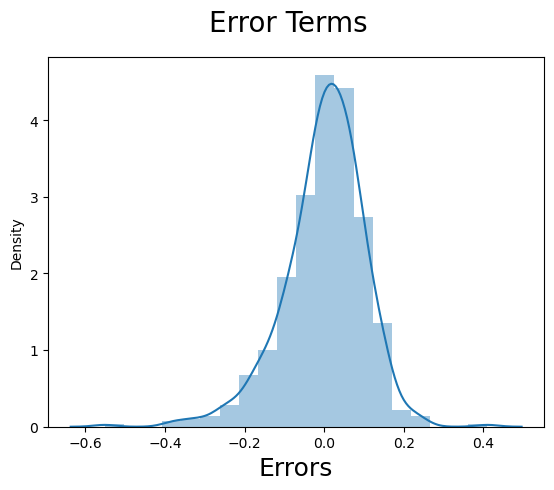

In [541]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 9: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

In [455]:
bike_test.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
184   0        1           0  29.793347  63.7917   5.459106  6043       0   
535   1        0           1  32.082500  59.2083   7.625404  6211       0   
299   0        0           1  19.270000  81.2917  13.250121  2659       0   
221   0        0           1  31.433347  42.4167  13.417286  4780       0   
152   0        0           1  29.315000  30.5000  19.583229  4968       0   

     summer  winter  aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep  \
184       0       0    0    0    0    0    1    0    0    0    0    0    0   
535       1       0    0    0    0    0    0    1    0    0    0    0    0   
299       0       1    0    0    0    0    0    0    0    0    0    1    0   
221       0       0    1    0    0    0    0    0    0    0    0    0    0   
152       1       0    0    0    0    0    0    1    0    0    0    0    0   

     mon  sat  sun  thu  tue  wed  light snow & rain  mist & cloudy  
184    1    0    0    0    0    0                  0              1  
535    0    0    0    0    0    1                  0              0  
299    0    0    0    1    0    0                  0              1  
221    0    0    0    0    0    1                  0              0  
152    0    0    0    1    0    0                  0              0

In [457]:
# Apply scaler() to all the numeric columns except the 'binary' and 'dummy' variables
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']

bike_test[bike_vars] = scaler.transform(bike_test[bike_vars])

In [459]:
bike_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.445205    0.034247    0.746575    0.569603    0.635933    0.315127   
std      0.498699    0.182488    0.436469    0.238088    0.156357    0.161524   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.250000    0.359075    0.534457    0.196160   
50%      0.000000    0.000000    1.000000    0.560248    0.614856    0.306383   
75%      1.000000    0.000000    1.000000    0.801929    0.730570    0.411976   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.800793   

              cnt      spring      summer      winter         aug         dec  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.517368    0.226027    0.273973    0.219178    0.061644    0.075342   
std      0.212757    0.419697    0.447530    0.415114    0.241335    0.264852   
min      0.055683    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.391251    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.508916    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.649994    0.000000    1.000000    0.000000    0.000000    0.000000   
max      0.963300    1.000000    1.000000    1.000000    1.000000    1.000000   

              feb         jan         jul         jun         mar         may  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.089041    0.075342    0.123288    0.102740    0.061644    0.075342   
std      0.285783    0.264852    0.329899    0.304664    0.241335    0.264852   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              nov         oct         sep         mon         sat         sun  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.089041    0.054795    0.089041    0.123288    0.116438    0.102740   
std      0.285783    0.228362    0.285783    0.329899    0.321854    0.304664   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              thu         tue         wed  light snow & rain  mist & cloudy  
count  146.000000  146.000000  146.000000         146.000000     146.000000  
mean     0.171233    0.178082    0.089041           0.034247       0.315068  
std      0.378009    0.383899    0.285783           0.182488       0.466142  
min      0.000000    0.000000    0.000000           0.000000       0.000000  
25%      0.000000    0.000000    0.000000           0.000000       0.000000  
50%      0.000000    0.000000    0.000000           0.000000       0.000000  
75%      0.000000    0.000000    0.000000           0.000000       1.000000  
max      1.000000    1.000000    1.000000           1.000000       1.000000

In [461]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [543]:
# Now let's use our model to make predictions.


X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [545]:
# Making predictions
y_test_pred = lr_6.predict(X_test_new)

## Step 10: Model Evaluation

Let's Find out the R-Square of Final Model on Train Dataset and Test Dataset respectively

In [547]:
print('The R-Square of Final Model on Train Dataset is:- ',round(r2_score(y_train,y_train_pred),4))
print('The R-Square of Final Model on Test Dataset is:-  ',round(r2_score(y_test,y_test_pred),4))

The R-Square of Final Model on Train Dataset is:-  0.7944
The R-Square of Final Model on Test Dataset is:-   0.7339


Text(0, 0.5, 'y_test_pred')

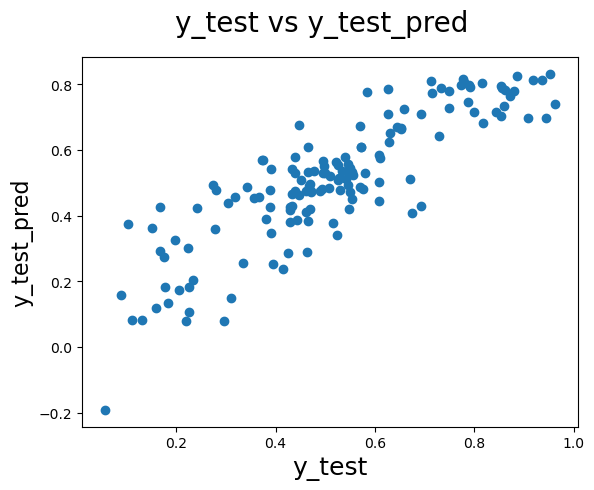

In [549]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

### Conclusion 
- yr:  coefficient value of ‘0.2418’ indicates that a unit increase in yr variable increases the bike hire numbers by 0.2418 units.
- light snow and rain:- A coefficient value of ‘-0.3140’ indicates that, w.r.t Weathersit, a unit increase in Weathersit variable decreases the bike hire numbers by 0.3140 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
